In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.linear_model import LinearRegression
from torchviz import make_dot

In [2]:
x = np.random.rand(100, 1)

In [3]:
y = 2 * x + 1 + .1 * np.random.randn(100, 1)

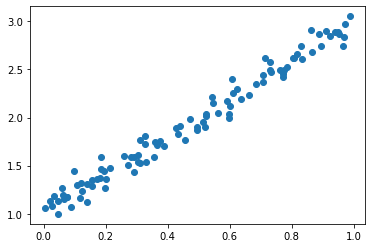

In [4]:
plt.scatter(x, y)

In [5]:
idx = np.arange(100)
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
np.random.shuffle(idx)
idx

array([76, 83, 80, 98,  2, 77, 71, 84, 89, 50, 40, 51, 67, 86, 37, 49,  4,
       10, 69, 81,  9, 54, 55, 87, 64, 44, 90, 75, 33, 30, 93, 95, 14, 61,
       11, 13, 15,  7,  0, 19, 35,  6, 12, 65, 70, 88, 56, 58, 28, 38, 91,
       42,  8, 73, 39, 85, 25, 92, 41, 26,  1, 22, 21, 46, 74, 79, 78, 72,
       57, 53, 24, 17, 66, 32, 31, 62, 59, 52, 82, 23, 36,  5, 45, 99, 43,
       16, 48, 94, 34,  3, 18, 47, 60, 68, 63, 27, 96, 29, 20, 97])

In [7]:
train_idx = idx[:80]
test_idx = idx[80:]

In [8]:
xTrain = x[train_idx].astype('float32')
yTrain = y[train_idx].astype('float32')
xTest = x[test_idx].astype('float32')
yTest = y[test_idx].astype('float32')

In [9]:
nEpochs = 400
learningRate = 0.1

In [10]:
a = np.random.randn(1)
b = np.random.randn(1)
lossByEpoch = []
for i in range(nEpochs) : 
    yPred = xTrain * a + b
    error = yPred - yTrain
    loss = (error ** 2).mean()
    aGrad = -2 * (error * xTrain).mean()
    bGrad = -2 * error.mean()
    a = a + learningRate * aGrad
    b = b + learningRate * bGrad
    lossByEpoch.append(np.log(loss))

endLoss = loss
print(a, b)

[1.96255165] [1.02681811]


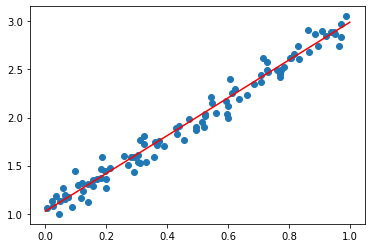

In [11]:
fig1, ax1 = plt.subplots()
ax1.scatter(x, y)
ax1.plot([0 * a + b, 1 * a + b], color = 'red')

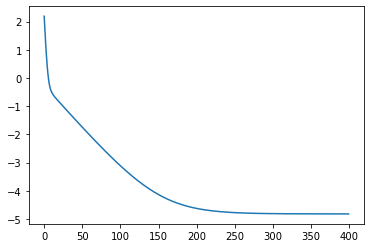

In [12]:

fig2, ax2 = plt.subplots()
ax2.plot(lossByEpoch)

In [13]:
yPred = xTest * a + b
error = yPred - yTest
validationLoss = (error ** 2).mean()
print(validationLoss)

0.008600978597181303


<h3>Comparing the results with sklearn regression</h3>

In [14]:
reg = LinearRegression().fit(xTrain, yTrain)

In [15]:
reg.score(xTest, yTest)

0.9611667583868841

In [16]:
yPred = reg.predict(xTest)
error = yPred - yTest
skLEarnLoss = (error ** 2).mean()
print(skLEarnLoss)

0.0086585


In [17]:
reg.coef_

array([[1.9689646]], dtype=float32)

In [18]:
reg.intercept_

array([1.0235407], dtype=float32)

<h3>Pytorch</h3>

In [19]:
import torch
import torch.optim as optim
import torch.nn as nn
# from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(xTrain).float().to(device)
y_train_tensor = torch.from_numpy(yTrain).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(xTrain), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [20]:
print(device)

cpu


In [21]:
# FIRST
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)
# Sorry, but NO! The to(device) "shadows" the gradient...

# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-0.9884], requires_grad=True) tensor([-0.9079], requires_grad=True)
tensor([-1.3715], requires_grad=True) tensor([-1.3093], requires_grad=True)
tensor([0.7806], requires_grad=True) tensor([0.7179], requires_grad=True)


In [22]:
xTrain = torch.from_numpy(xTrain)
yTrain = torch.from_numpy(yTrain)
xTest = torch.from_numpy(xTest)
yTest = torch.from_numpy(yTest)

In [23]:
a = torch.tensor(1,dtype = torch.float, requires_grad = True)
b = torch.tensor(1,dtype = torch.float,requires_grad = True)

In [24]:
a = torch.tensor(1,dtype = torch.float, requires_grad = True)
b = torch.tensor(1,dtype = torch.float,requires_grad = True)

nEpochs = 400
variablesByEpoch = torch.zeros((3, nEpochs), dtype = torch.float)
for i in range(nEpochs) : 
    yPred = xTrain * a + b
    error = yPred - yTrain
    loss = (error ** 2).mean()
    loss.backward()
    with torch.no_grad():
            a.sub_(learningRate * a.grad)
            b.sub_(learningRate* b.grad)
    a.grad.zero_()
    b.grad.zero_()
    variablesByEpoch[0][i] = a.clone().detach()
    variablesByEpoch[1][i] = b.clone().detach()
    variablesByEpoch[2][i] = loss.clone().detach()


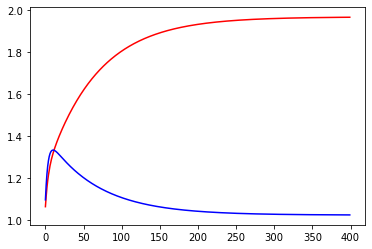

In [25]:
fig3, ax1 = plt.subplots()
ax1.plot(variablesByEpoch[0], color = 'red')
ax1.plot(variablesByEpoch[1], color = 'blue')

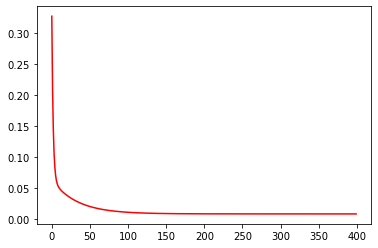

In [26]:
fig4, ax1 = plt.subplots()
ax1.plot(variablesByEpoch[2], color = 'red')

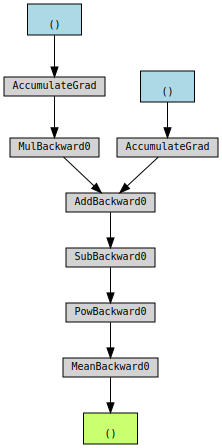

In [27]:
make_dot(loss)

In [28]:
a = torch.tensor(1,dtype = torch.float, requires_grad = True)
b = torch.tensor(1,dtype = torch.float,requires_grad = True)

nEpochs = 400
variablesByEpoch = torch.zeros((3, nEpochs), dtype = torch.float)

optimizer = optim.SGD([a, b], lr = learningRate)

for i in range(nEpochs) : 
    yPred = xTrain * a + b
    error = yPred - yTrain
    loss = (error ** 2).mean()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    variablesByEpoch[0][i] = a.clone().detach()
    variablesByEpoch[1][i] = b.clone().detach()
    variablesByEpoch[2][i] = loss.clone().detach()



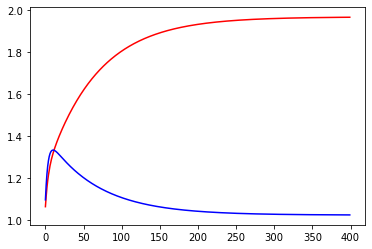

In [29]:
fig5, ax1 = plt.subplots()
ax1.plot(variablesByEpoch[0], color = 'red')
ax1.plot(variablesByEpoch[1], color = 'blue')

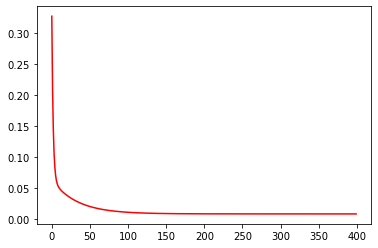

In [30]:
fig6, ax1 = plt.subplots()
ax1.plot(variablesByEpoch[2], color = 'red')

<h3>Using nn.loss</h3>

In [31]:
a = torch.tensor(1,dtype = torch.float, requires_grad = True)
b = torch.tensor(1,dtype = torch.float,requires_grad = True)

nEpochs = 400
variablesByEpoch = torch.zeros((3, nEpochs), dtype = torch.float)

optimizer = optim.SGD([a, b], lr = learningRate)

loss_fn = nn.MSELoss(reduction = 'mean')

for i in range(nEpochs) : 
    yPred = xTrain * a + b
    loss = loss_fn(yPred, yTrain)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

<h3>Using model class</h3>

In [32]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
#         self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
#         self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # Computes the outputs / predictions
        return self.linear(x)
#         return self.a * x + self.b

In [33]:
model = ManualLinearRegression()

loss_fn = nn.MSELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = learningRate)

for epoch in range(nEpochs) : 
    model.train()
    yPred = (model(xTrain))
    loss = loss_fn(yTrain, yPred)
    loss.backward()
    
    optimizer.step()    
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[1.9668]])), ('linear.bias', tensor([1.0247]))])


<h3>Making a train step</h3>

In [34]:
def make_train_step(model, loss_fn, optimizer) : 
    
    def train_step(xTrain, yTrain) : 
        model.train()
        yPred = (model(xTrain))
        loss = loss_fn(yTrain, yPred)
        loss.backward()
        
        optimizer.step()    
        optimizer.zero_grad()
        return loss.detach()
    
    return train_step

In [35]:
model = ManualLinearRegression()
optimizer = optim.SGD(model.parameters(), lr = learningRate)
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(nEpochs) : 
    loss = train_step(xTrain, yTrain)
    losses.append(torch.log(loss))

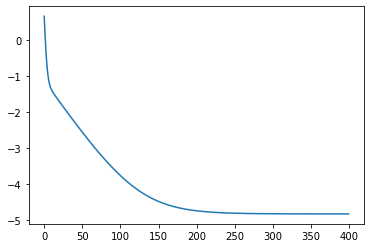

In [36]:
plt.plot(losses)

<h3>Creating a dataset</h3>

In [37]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

train_data = CustomDataset(xTrain, yTrain)
print(train_data[0])

train_data = TensorDataset(xTrain, yTrain)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


<h3>Using a data loader</h3>

In [38]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

In [39]:
print(next(iter(train_loader)))

[tensor([[0.7132],
        [0.0254],
        [0.8872],
        [0.5427],
        [0.4722],
        [0.8662],
        [0.7722],
        [0.4402],
        [0.0206],
        [0.5248],
        [0.0344],
        [0.6075],
        [0.6011],
        [0.5613],
        [0.6376],
        [0.8084]]), tensor([[2.6162],
        [1.0785],
        [2.8708],
        [2.2161],
        [1.9857],
        [2.6805],
        [2.4208],
        [1.9105],
        [1.1327],
        [2.0167],
        [1.1831],
        [2.4037],
        [2.1214],
        [2.0472],
        [2.1930],
        [2.6141]])]


In [40]:
losses = []

model = ManualLinearRegression()
optimizer = optim.SGD(model.parameters(), lr = learningRate)
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(nEpochs):
    for x_batch, y_batch in train_loader:

        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[1.9685]])), ('linear.bias', tensor([1.0220]))])


In [41]:
from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

In [43]:
losses = []
valLosses = []

model = ManualLinearRegression()
optimizer = optim.SGD(model.parameters(), lr = learningRate)
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(nEpochs):
    for x_batch, y_batch in train_loader:
#         x_batch = x_batch.to(device)
#         y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    with torch.no_grad() : 
        for x_val, y_val in val_loader:
#             x_val = x_val.to(device)
#             y_val = y_val.to(device)
            
            model.eval()

            yhat = model(x_val)
            valLoss = loss_fn(y_val, yhat)
            valLosses.append(valLoss.item())
            
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[1.9721]])), ('linear.bias', tensor([1.0167]))])


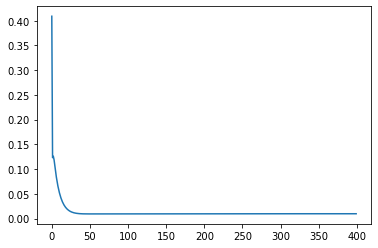

In [46]:
plt.plot(valLosses)

In [9]:
from datetime import datetime
datetime.now().strftime("%Y_%m_%d-%H:%M:%S")

'2021_12_24-13:28:43'